In [1]:
# Import

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

from sklearn import svm

In [2]:
heart = pd.read_csv('../input/heart-attack-analysis-prediction-dataset/heart.csv')
# checking if there is a missing value
heart.isnull().nunique()

age         1
sex         1
cp          1
trtbps      1
chol        1
fbs         1
restecg     1
thalachh    1
exng        1
oldpeak     1
slp         1
caa         1
thall       1
output      1
dtype: int64

In [3]:
# checking value type of columns
heart.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [4]:
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
# it seems cp, rest_ecg, exang and thalach are related to output and may cause data leakage
# it seems caa and oldpeak have around 1 std causes very low deviation from mean

# defining X and Y
X = heart[['age','sex','chol','fbs','trtbps']]
Y = heart[['output']]


# it seems there is a lot of difference between X columns
X = preprocessing.StandardScaler().fit(X).transform(X)
print(X.shape)
print(Y.shape)

(303, 5)
(303, 1)


In [6]:
# splitting train and test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [7]:
# model
k = 4
# train model
neigh = KNeighborsClassifier(n_neighbors = k)
neigh.fit(X_train,y_train)
# predict
yhat = neigh.predict(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [8]:
# analyzing the output
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7405660377358491
Test set Accuracy:  0.6153846153846154


It seems the KNN is not a good predictor!

In [9]:
# train logistic regression
LR = LogisticRegression(C=0.1, solver='saga')
LR.fit(X_train,y_train)

# predict using LR
yhat_lr = LR.predict(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat_lr, labels=[1,0]))

[[37 13]
 [17 24]]


Confusion matrix, without normalization
[[37 13]
 [17 24]]
Train set Accuracy:  0.6556603773584906
Test set Accuracy:  0.6703296703296703


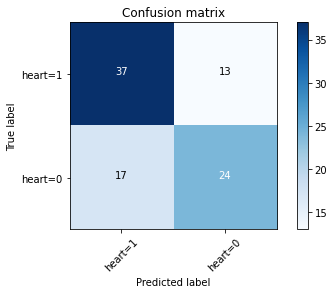

In [11]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_lr, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['heart=1','heart=0'],normalize= False,  title='Confusion matrix')

print("Train set Accuracy: ", metrics.accuracy_score(y_train, LR.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_lr))

It may be a good idea to test a SVM model

In [12]:
# train the model
clf = svm.SVC(C=0.1, kernel='linear')
clf.fit(X_train, y_train) 

# predict
yhat_svm = clf.predict(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
print("Test set Accuracy of SVM: ", metrics.accuracy_score(y_test, yhat_svm))
print("Test set Accuracy of LR: ", metrics.accuracy_score(y_test, yhat_lr))
print("Test set Accuracy of KNN: ", metrics.accuracy_score(y_test, yhat))

Test set Accuracy of SVM:  0.6593406593406593
Test set Accuracy of LR:  0.6703296703296703
Test set Accuracy of KNN:  0.6153846153846154
